In [1]:
!nvidia-smi

Fri Jul 23 19:54:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary

In [3]:
!git clone https://github.com/hassiahk/train-your-model-pytorch.git

Cloning into 'train-your-model-pytorch'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 113 (delta 60), reused 82 (delta 32), pack-reused 0
Receiving objects: 100% (113/113), 21.31 KiB | 10.65 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [4]:
%cd train-your-model-pytorch/

/content/train-your-model-pytorch


In [5]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(42)

In [6]:
mean, std = calculate_mean_std("TinyImageNet")
mean, std

((0.4802, 0.4481, 0.3975), (0.2302, 0.2265, 0.2262))

In [7]:
from utils.transforms import apply_transforms_tiny_imagenet
train_transforms, test_transforms = apply_transforms_tiny_imagenet(mean, std)

In [8]:
from utils.dataset import TinyImageNet

train_dataset = TinyImageNet(root='data/', train=True, download=True, transform=train_transforms)
test_dataset = TinyImageNet(root='data/', train=False, download=False, transform=test_transforms)

In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False, pin_memory=True, num_workers=2)

In [10]:
labels = train_dataset.classes
labels[:10]

['Egyptian cat',
 'reel',
 'volleyball',
 'rocking chair',
 'lemon',
 'bullfrog',
 'basketball',
 'cliff',
 'espresso',
 'plunger']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

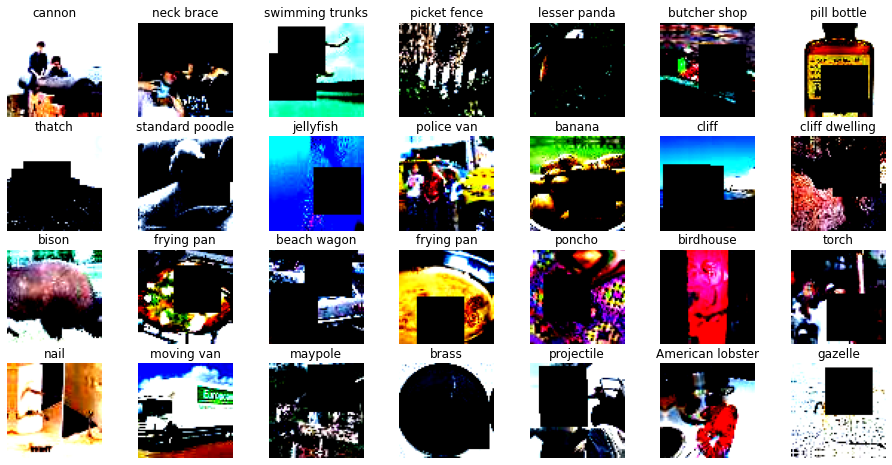

In [11]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

In [12]:
device = get_default_device()
device

device(type='cuda')

In [13]:
from models.resnet18 import resnet18
from utils.helper import model_summary

model = resnet18("BN").to(device)

model_summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [14]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 50
lr = 0.01
l1_factor = 0

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()

In [15]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, lr)

  0%|          | 0/151 [00:00<?, ?it/s]

Epoch 1:


Train Loss=5.168421745300293 Batch_id=150 LR= 0.00050 Train Accuracy= 1.59: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0101, Test Accuracy: 1008/33000 (3.05%)

Epoch 2:


Train Loss=5.024040222167969 Batch_id=150 LR= 0.00082 Train Accuracy= 3.81: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0096, Test Accuracy: 1483/33000 (4.49%)

Epoch 3:


Train Loss=4.657078742980957 Batch_id=150 LR= 0.00132 Train Accuracy= 5.51: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0091, Test Accuracy: 2093/33000 (6.34%)

Epoch 4:


Train Loss=4.530813217163086 Batch_id=150 LR= 0.00199 Train Accuracy= 7.54: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0089, Test Accuracy: 2293/33000 (6.95%)

Epoch 5:


Train Loss=4.419885158538818 Batch_id=150 LR= 0.00280 Train Accuracy= 9.87: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0085, Test Accuracy: 3326/33000 (10.08%)

Epoch 6:


Train Loss=4.045364856719971 Batch_id=150 LR= 0.00372 Train Accuracy= 12.16: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0083, Test Accuracy: 3642/33000 (11.04%)

Epoch 7:


Train Loss=3.9006879329681396 Batch_id=150 LR= 0.00470 Train Accuracy= 14.77: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0084, Test Accuracy: 3647/33000 (11.05%)

Epoch 8:


Train Loss=3.6800971031188965 Batch_id=150 LR= 0.00571 Train Accuracy= 16.69: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0075, Test Accuracy: 5429/33000 (16.45%)

Epoch 9:


Train Loss=3.694608688354492 Batch_id=150 LR= 0.00669 Train Accuracy= 18.59: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0079, Test Accuracy: 4863/33000 (14.74%)

Epoch 10:


Train Loss=3.51838755607605 Batch_id=150 LR= 0.00760 Train Accuracy= 20.28: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0073, Test Accuracy: 5997/33000 (18.17%)

Epoch 11:


Train Loss=3.537307024002075 Batch_id=150 LR= 0.00842 Train Accuracy= 21.86: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0069, Test Accuracy: 6904/33000 (20.92%)

Epoch 12:


Train Loss=3.3098461627960205 Batch_id=150 LR= 0.00909 Train Accuracy= 23.47: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0070, Test Accuracy: 6741/33000 (20.43%)

Epoch 13:


Train Loss=3.3105194568634033 Batch_id=150 LR= 0.00959 Train Accuracy= 24.69: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0067, Test Accuracy: 7592/33000 (23.01%)

Epoch 14:


Train Loss=3.1745591163635254 Batch_id=150 LR= 0.00990 Train Accuracy= 26.10: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0069, Test Accuracy: 6990/33000 (21.18%)

Epoch 15:


Train Loss=3.2141876220703125 Batch_id=150 LR= 0.01000 Train Accuracy= 27.00: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0067, Test Accuracy: 7436/33000 (22.53%)

Epoch 16:


Train Loss=3.1967389583587646 Batch_id=150 LR= 0.00998 Train Accuracy= 28.38: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0066, Test Accuracy: 7734/33000 (23.44%)

Epoch 17:


Train Loss=3.0244829654693604 Batch_id=150 LR= 0.00992 Train Accuracy= 29.42: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0070, Test Accuracy: 7176/33000 (21.75%)

Epoch 18:


Train Loss=2.8824868202209473 Batch_id=150 LR= 0.00982 Train Accuracy= 30.24: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0067, Test Accuracy: 7851/33000 (23.79%)

Epoch 19:


Train Loss=3.142005681991577 Batch_id=150 LR= 0.00968 Train Accuracy= 31.12: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0061, Test Accuracy: 9232/33000 (27.98%)

Epoch 20:


Train Loss=3.0178885459899902 Batch_id=150 LR= 0.00950 Train Accuracy= 31.97: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0063, Test Accuracy: 8632/33000 (26.16%)

Epoch 21:


Train Loss=3.1669423580169678 Batch_id=150 LR= 0.00929 Train Accuracy= 32.84: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0061, Test Accuracy: 9284/33000 (28.13%)

Epoch 22:


Train Loss=2.975309133529663 Batch_id=150 LR= 0.00904 Train Accuracy= 33.68: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0060, Test Accuracy: 9584/33000 (29.04%)

Epoch 23:


Train Loss=2.8022966384887695 Batch_id=150 LR= 0.00876 Train Accuracy= 34.42: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0065, Test Accuracy: 7949/33000 (24.09%)

Epoch 24:


Train Loss=2.842642307281494 Batch_id=150 LR= 0.00845 Train Accuracy= 35.05: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0059, Test Accuracy: 10088/33000 (30.57%)

Epoch 25:


Train Loss=2.828903913497925 Batch_id=150 LR= 0.00812 Train Accuracy= 35.89: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0061, Test Accuracy: 9307/33000 (28.20%)

Epoch 26:


Train Loss=2.6567163467407227 Batch_id=150 LR= 0.00775 Train Accuracy= 36.67: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0057, Test Accuracy: 10396/33000 (31.50%)

Epoch 27:


Train Loss=2.515519142150879 Batch_id=150 LR= 0.00737 Train Accuracy= 37.31: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0053, Test Accuracy: 11906/33000 (36.08%)

Epoch 28:


Train Loss=2.6481239795684814 Batch_id=150 LR= 0.00696 Train Accuracy= 37.69: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0053, Test Accuracy: 12095/33000 (36.65%)

Epoch 29:


Train Loss=2.7700557708740234 Batch_id=150 LR= 0.00654 Train Accuracy= 38.42: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0051, Test Accuracy: 12685/33000 (38.44%)

Epoch 30:


Train Loss=2.780160903930664 Batch_id=150 LR= 0.00611 Train Accuracy= 39.31: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0052, Test Accuracy: 12521/33000 (37.94%)

Epoch 31:


Train Loss=2.861793279647827 Batch_id=150 LR= 0.00567 Train Accuracy= 39.96: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0055, Test Accuracy: 11446/33000 (34.68%)

Epoch 32:


Train Loss=2.714322090148926 Batch_id=150 LR= 0.00522 Train Accuracy= 40.86: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0053, Test Accuracy: 11993/33000 (36.34%)

Epoch 33:


Train Loss=2.391345977783203 Batch_id=150 LR= 0.00477 Train Accuracy= 41.42: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0049, Test Accuracy: 13428/33000 (40.69%)

Epoch 34:


Train Loss=2.4326467514038086 Batch_id=150 LR= 0.00433 Train Accuracy= 42.03: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0051, Test Accuracy: 12788/33000 (38.75%)

Epoch 35:


Train Loss=2.3884057998657227 Batch_id=150 LR= 0.00388 Train Accuracy= 43.07: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0050, Test Accuracy: 12921/33000 (39.15%)

Epoch 36:


Train Loss=2.302630662918091 Batch_id=150 LR= 0.00345 Train Accuracy= 43.66: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0047, Test Accuracy: 13954/33000 (42.28%)

Epoch 37:


Train Loss=2.2866828441619873 Batch_id=150 LR= 0.00303 Train Accuracy= 44.57: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0048, Test Accuracy: 13647/33000 (41.35%)

Epoch 38:


Train Loss=2.5081727504730225 Batch_id=150 LR= 0.00263 Train Accuracy= 45.41: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0046, Test Accuracy: 14442/33000 (43.76%)

Epoch 39:


Train Loss=2.3057875633239746 Batch_id=150 LR= 0.00224 Train Accuracy= 46.37: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0045, Test Accuracy: 14757/33000 (44.72%)

Epoch 40:


Train Loss=2.3410298824310303 Batch_id=150 LR= 0.00188 Train Accuracy= 47.32: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0046, Test Accuracy: 14492/33000 (43.92%)

Epoch 41:


Train Loss=2.1772818565368652 Batch_id=150 LR= 0.00154 Train Accuracy= 48.53: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0043, Test Accuracy: 15676/33000 (47.50%)

Epoch 42:


Train Loss=2.3801708221435547 Batch_id=150 LR= 0.00123 Train Accuracy= 49.42: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0043, Test Accuracy: 15694/33000 (47.56%)

Epoch 43:


Train Loss=2.1819539070129395 Batch_id=150 LR= 0.00095 Train Accuracy= 50.46: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0041, Test Accuracy: 16482/33000 (49.95%)

Epoch 44:


Train Loss=1.9614934921264648 Batch_id=150 LR= 0.00071 Train Accuracy= 51.83: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0040, Test Accuracy: 16672/33000 (50.52%)

Epoch 45:


Train Loss=1.9664332866668701 Batch_id=150 LR= 0.00049 Train Accuracy= 53.02: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0040, Test Accuracy: 16855/33000 (51.08%)

Epoch 46:


Train Loss=2.059232234954834 Batch_id=150 LR= 0.00032 Train Accuracy= 54.38: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0038, Test Accuracy: 17331/33000 (52.52%)

Epoch 47:


Train Loss=1.9714179039001465 Batch_id=150 LR= 0.00018 Train Accuracy= 55.35: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0038, Test Accuracy: 17630/33000 (53.42%)

Epoch 48:


Train Loss=1.818738579750061 Batch_id=150 LR= 0.00008 Train Accuracy= 56.46: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0037, Test Accuracy: 17827/33000 (54.02%)

Epoch 49:


Train Loss=2.113966464996338 Batch_id=150 LR= 0.00002 Train Accuracy= 57.02: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0037, Test Accuracy: 17946/33000 (54.38%)

Epoch 50:


Train Loss=1.8948308229446411 Batch_id=150 LR= 0.00000 Train Accuracy= 57.12: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]



: Average Test loss: 0.0037, Test Accuracy: 17967/33000 (54.45%)



Total wrong predictions are 15033



Extracting ./data/cifar-10-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

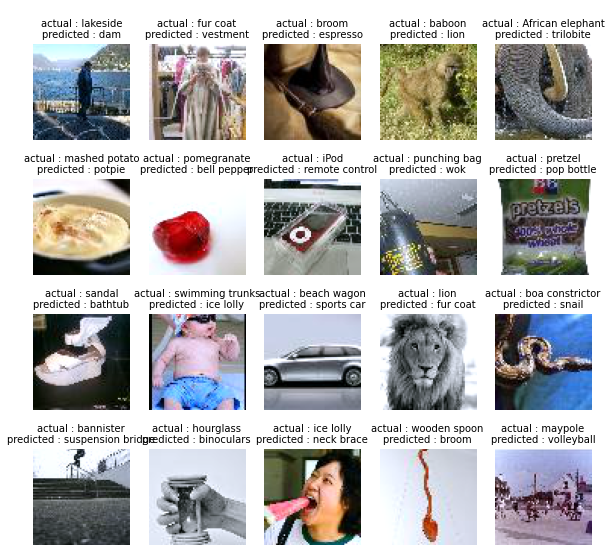

In [16]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device, labels)

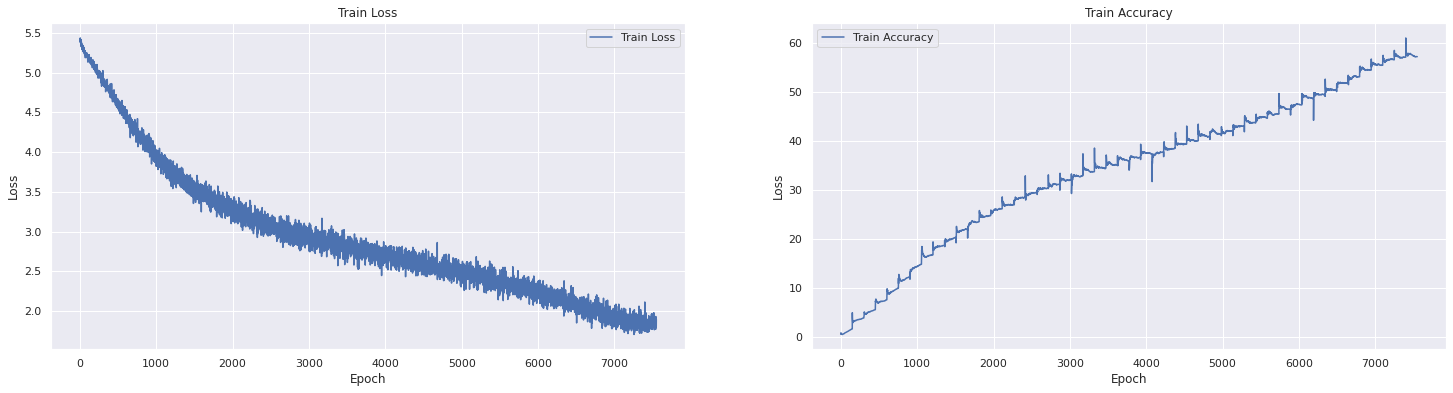

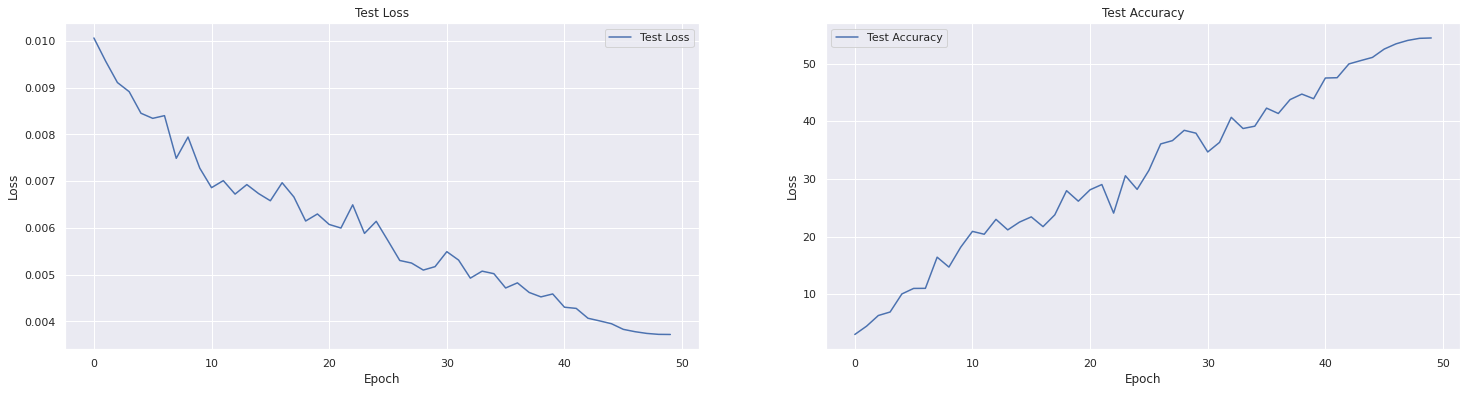

In [17]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [19]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of Egyptian cat : 39 %
Accuracy of  reel : 30 %
Accuracy of volleyball : 55 %
Accuracy of rocking chair : 58 %
Accuracy of lemon : 71 %
Accuracy of bullfrog : 64 %
Accuracy of basketball : 70 %
Accuracy of cliff : 51 %
Accuracy of espresso : 78 %
Accuracy of plunger :  3 %
Accuracy of parking meter : 45 %
Accuracy of German shepherd : 63 %
Accuracy of dining table : 59 %
Accuracy of monarch : 89 %
Accuracy of brown bear : 65 %
Accuracy of school bus : 84 %
Accuracy of pizza : 77 %
Accuracy of guinea pig : 61 %
Accuracy of umbrella : 22 %
Accuracy of organ : 62 %
Accuracy of  oboe : 35 %
Accuracy of maypole : 68 %
Accuracy of goldfish : 84 %
Accuracy of potpie : 63 %
Accuracy of hourglass : 51 %
Accuracy of seashore : 61 %
Accuracy of computer keyboard : 56 %
Accuracy of Arabian camel : 53 %
Accuracy of ice cream : 30 %
Accuracy of  nail : 21 %
Accuracy of space heater : 50 %
Accuracy of cardigan : 43 %
Accuracy of baboon : 36 %
Accuracy of snail : 38 %
Accuracy of coral reef :

Generating Grad-CAM for layer1
Generating Grad-CAM for layer2
Generating Grad-CAM for layer3
Generating Grad-CAM for layer4


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


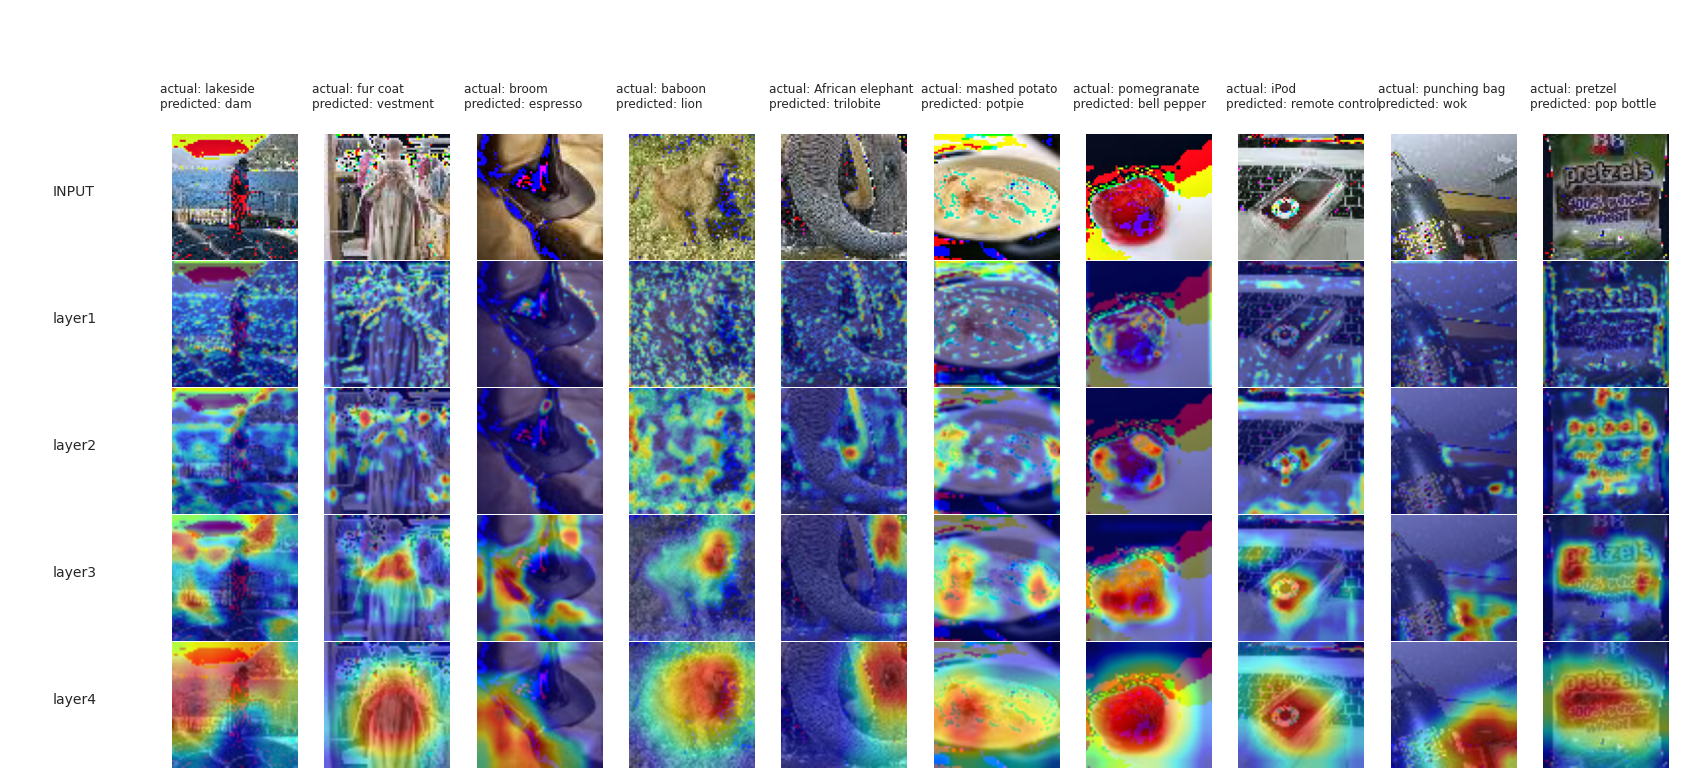

In [20]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 64, 64), predicted_classes, images_misclassified[:10])